In [1]:
%load_ext autoreload

In [2]:
%autoreload 2
%matplotlib inline

In [3]:
import pandas as pd 
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

from SepMe.processing.batchprocessing import *

SepMe - INFO - MLFLOW_TRACKING_URI - http://localhost:5000


In [4]:
os.getcwd()

'/home/morarica/Developer/SepMe/Jupyters/ml'

In [7]:
sepme_path = '../../data/mturk_samples/phase1/graph_results/res_mturk_batch.csv'
res_path = '../all.csv'

dataset_path = '../data/mturk_samples/phase1/data/'

In [8]:
sep_df = pd.read_csv(sepme_path)
sep_df.columns = ['filename'] + list(sep_df.columns)[1:]
print(sep_df.shape)
sep_df.index = sep_df.filename
sep_df = sep_df.drop(['filename'], axis=1).stack().reset_index()
sep_df.columns = ['filename', 'method', 'value']

stuff = [row.split('_') for i,row in sep_df['method'].items() ]


new_stuff = []
for s in stuff: 
    ns = []

    if len(s)<=2:
        ns = ['del', 'n/a', 'mcec', -1]

    
    else:
        ns.append(s[0]) #graph_type
        try: 
            ns.append(float(s[1]))  #graph_param
            ns.append(s[2])  #graph_purity
            if len(s)==4:
                try:
                    ns.append(int(s[3]))  #class
                except ValueError:
                    ns.append(-1)  #class
            
            else:
                ns.append(-1)  #class

            if len(s)==5:
                ns[2] += '_' + s[4] #purity

        except ValueError:
            #print(s[1])
            ns.append('n/a')
            ns.append(s[1])  #graph_purity
            try:
                ns.append(int(s[2]))  #class
            except ValueError:
                ns.append(-1)  #class
            if len(s)==4:
                ns[2] += '_' + s[3]
        

    new_stuff.append(ns)
    #print('s {} - ns {}'.format(s,ns))
    if len(ns)!=4:
        print(ns)
    


sep_df['graph_type'] = [s[0] for s in new_stuff]
sep_df['graph_param'] = [s[1] for s in new_stuff]
sep_df['graph_purity'] = [s[2] for s in new_stuff]
sep_df['class'] = [s[3] for s in new_stuff]



sep_df.groupby(['graph_purity']).count()

sep_df = sep_df.loc[sep_df['class'].between(0,8)]

sep_df = sep_df.drop(['method'], axis=1)

sep_df['graph'] = ['{}_{}_{}'.format(row['graph_type'],row['graph_param'],row['graph_purity']) for i, row in sep_df.iterrows()]
sep_df['idx']= ['{}:{}'.format(row['filename'],row['class']) for i, row in sep_df.iterrows()]
sep_df.to_csv('sepme_data.csv', index=False)



(130, 1276)


In [11]:
list(sep_df.columns)

['filename',
 'value',
 'graph_type',
 'graph_param',
 'graph_purity',
 'class',
 'graph',
 'idx']

In [12]:
df = sep_df.pivot(index='idx', columns='graph', values='value').reset_index()
df['class'] = [int(row['idx'].split(':')[-1]) for i,row in df.iterrows()]
df['idx'] = [row['idx'].split('1-2')[0] + str(row['class']) for i,row in df.iterrows()]
df = df.dropna(thresh=0.8*len(df), axis=1).dropna(thresh=0.5*df.shape[1], axis=0)
df

graph,idx,as_0.02_ce,as_0.02_cp,as_0.02_ltcc,as_0.05_ce,as_0.05_cp,as_0.05_ltcc,as_0.1_ce,as_0.1_cp,as_0.1_ltcc,...,knn_4.0_ce,knn_4.0_cp,knn_4.0_ltcc,knn_6.0_ce,knn_6.0_cp,knn_6.0_ltcc,knn_8.0_ce,knn_8.0_cp,knn_8.0_ltcc,class
0,JavierGeneratedData_3dinterleaved_3classes_Gli...,0.120411,0.924940,1.000000,0.120411,0.924940,1.000000,0.120411,0.924940,1.000000,...,0.042715,0.972561,1.000000,0.042863,0.973577,1.000000,0.053399,0.971037,1.000000,0
1,JavierGeneratedData_3dinterleaved_3classes_Gli...,0.076577,0.957971,0.993711,0.076577,0.957971,0.993711,0.076577,0.957971,0.993711,...,0.023017,0.977987,0.993711,0.036392,0.971698,0.993711,0.045652,0.966195,0.993711,1
2,JavierGeneratedData_3dinterleaved_3classes_Gli...,0.066317,0.957709,0.993631,0.066317,0.957709,0.993631,0.066317,0.957709,0.993631,...,0.036917,0.969745,0.993631,0.046465,0.967091,0.993631,0.050836,0.964172,1.000000,2
3,JavierGeneratedData_3dinterleaved_4classes_PCA_0,0.165507,0.862239,1.000000,0.165507,0.862239,1.000000,0.165507,0.862239,1.000000,...,0.091702,0.905063,0.987342,0.106075,0.892405,0.987342,0.119498,0.878165,1.000000,0
4,JavierGeneratedData_3dinterleaved_4classes_PCA_1,0.127282,0.874479,0.975000,0.127282,0.874479,0.975000,0.127282,0.874479,0.975000,...,0.129764,0.865625,0.637500,0.144952,0.850000,0.987500,0.172144,0.829688,0.987500,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
696,yeast_PCA_4,0.454023,0.346825,0.048611,0.454023,0.346825,0.048611,0.454023,0.346825,0.048611,...,0.457228,0.142361,0.048611,0.496767,0.149306,0.048611,0.529387,0.144965,0.062500,4
697,yeast_PCA_5,0.471713,0.340137,0.551351,0.471713,0.340137,0.551351,0.471713,0.340137,0.551351,...,0.373794,0.405405,0.351351,0.424168,0.409910,0.545946,0.460982,0.402703,0.578378,5
698,yeast_PCA_6,0.461118,0.331875,0.284507,0.461118,0.331875,0.284507,0.461118,0.331875,0.284507,...,0.383836,0.389437,0.098592,0.433943,0.383568,0.166197,0.464996,0.380282,0.180282,6
699,yeast_PCA_7,0.504101,0.235784,0.058824,0.504101,0.235784,0.058824,0.504101,0.235784,0.058824,...,0.518066,0.000000,0.058824,0.532290,0.000000,0.058824,0.553208,0.000000,0.058824,7


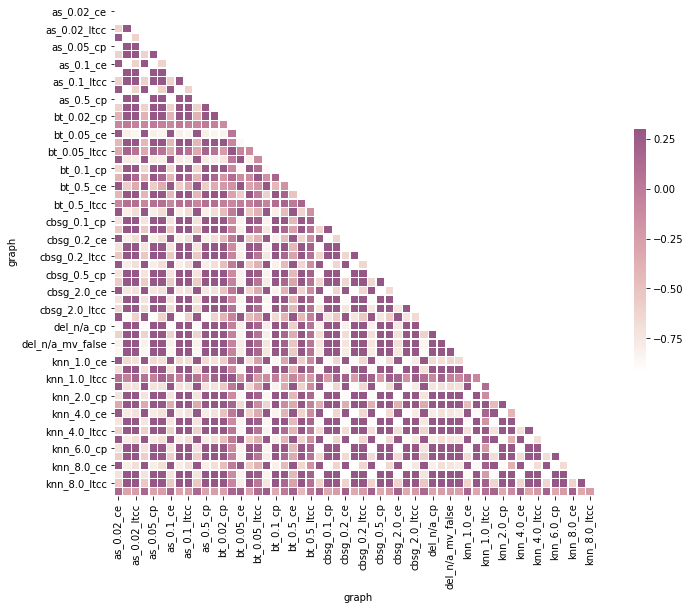

In [13]:
corr = df.corr()
corr
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.cubehelix_palette(light=1, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [14]:
res_df = pd.read_csv(res_path)
print(res_df.columns)

cols = ['fileName', 'WorkerId','total_recordings', 'type', '1v1', 'phase',
        'Reward', 'sep1', 'sep2', 'sep3', 'sep4', 'sep5', 'sep6', 'sep7', 'sep8','pass1', 'pass2', 'pass3', 'pass4']
seps = ['sep1', 'sep2', 'sep3', 'sep4']
passes = ['pass1', 'pass2', 'pass3', 'pass4']
res_df = res_df[cols]

for i in range(1,5):
    res_df.loc[res_df['sep{}'.format(i)].isna(), 'pass{}'.format(i)] = np.nan


res_df = res_df.set_index(['fileName', 'type', '1v1', 'phase'])
print(res_df.shape)
df1 = res_df[seps].stack().reset_index()
df2 = res_df[passes].stack().reset_index()

print(df2.shape)
print(df1.shape)

df1.columns = ['filename','type', '1v1', 'phase','class', 'human_rating']
df2.columns = ['filename','type', '1v1', 'phase','class', 'pass']

df1['class'] = [row.split('sep')[-1] for i, row in df1['class'].items()]
df2['class'] = [row.split('pass')[-1] for i, row in df2['class'].items()]


df1['idx'] = df1['filename'] + '_'+ df1['class'].astype(str)
df2['idx'] = df2['filename'] + '_'+ df2['class'].astype(str)


df2 = df2.drop(['filename','type', '1v1', 'phase','class'], axis=1)
print(df2.shape)
print(df1.shape)

df1 = pd.concat([df1,df2[['pass']]], axis =1)




/home/morarica/anaconda3/envs/SepMe/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3051: DtypeWarning: Columns (18) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Index(['1v1', 'AcceptTime', 'ApprovalTime', 'Approve',
       'AssignmentDurationInSeconds', 'AssignmentId', 'AssignmentStatus',
       'AutoApprovalDelayInSeconds', 'AutoApprovalTime', 'CreationTime',
       'Description', 'Expiration', 'HITId', 'HITTypeId', 'HITname',
       'Input.WorkerId', 'Input.class_set', 'Input.e', 'Input.file_name',
       'Input.i', 'Input.image_url', 'Keywords', 'Last30DaysApprovalRate',
       'Last7DaysApprovalRate', 'LifetimeApprovalRate', 'LifetimeInSeconds',
       'MaxAssignments', 'NumberOfSimilarHITs', 'Reject', 'RejectionTime',
       'RequesterAnnotation', 'RequesterFeedback', 'Reward', 'ShouldReward',
       'ShouldReward_2', 'SubmitTime', 'Title', 'WorkTimeInSeconds',
       'WorkerId', 'ap.1', 'ap.2', 'ap.3', 'ap.4', 'fileName', 'mp.1', 'mp.2',
       'mp.3', 'mp.4', 'pass1', 'pass2', 'pass3', 'pass4', 'passes', 'phase',
       'pneg1', 'pneg2', 'pneg3', 'pneg4', 'ppos1', 'ppos2', 'ppos3', 'ppos4',
       'sep1', 'sep2', 'sep3', 'sep4', 'sep5',

In [16]:
final_df = df1.merge(df, on=['idx'], how='left').dropna()

expert_df = pd.read_csv('../../data/orig_data/human_reduced_results.csv')
expert_df = expert_df[['index','M','A']]
expert_df

final_df = final_df.merge(expert_df, left_on='idx', right_on='index')

final_df.columns = list(final_df.columns)
final_df['class'] = final_df['class_x']
final_df = final_df.drop(['class_x', 'class_y'],axis=1)


final_df.to_csv('lazy_all.csv', index=False)
final_df


,filename,type,1v1,phase,human_rating,idx,pass,as_0.02_ce,as_0.02_cp,as_0.02_ltcc,...,knn_6.0_ce,knn_6.0_cp,knn_6.0_ltcc,knn_8.0_ce,knn_8.0_cp,knn_8.0_ltcc,index,M,A,class
0,JavierGeneratedData_3dinterleaved_3classes_Gli...,abstract,False,task,73.0,JavierGeneratedData_3dinterleaved_3classes_Gli...,1.0,0.076577,0.957971,0.993711,...,0.036392,0.971698,0.993711,0.045652,0.966195,0.993711,JavierGeneratedData_3dinterleaved_3classes_Gli...,5,5,1
1,JavierGeneratedData_3dinterleaved_3classes_Gli...,abstract,False,task,83.0,JavierGeneratedData_3dinterleaved_3classes_Gli...,1.0,0.076577,0.957971,0.993711,...,0.036392,0.971698,0.993711,0.045652,0.966195,0.993711,JavierGeneratedData_3dinterleaved_3classes_Gli...,5,5,1
2,JavierGeneratedData_3dinterleaved_3classes_Gli...,abstract,False,task,72.0,JavierGeneratedData_3dinterleaved_3classes_Gli...,1.0,0.076577,0.957971,0.993711,...,0.036392,0.971698,0.993711,0.045652,0.966195,0.993711,JavierGeneratedData_3dinterleaved_3classes_Gli...,5,5,1
3,JavierGeneratedData_3dinterleaved_3classes_Gli...,abstract,False,task,77.0,JavierGeneratedData_3dinterleaved_3classes_Gli...,1.0,0.076577,0.957971,0.993711,...,0.036392,0.971698,0.993711,0.045652,0.966195,0.993711,JavierGeneratedData_3dinterleaved_3classes_Gli...,5,5,1
4,JavierGeneratedData_3dinterleaved_3classes_Gli...,abstract,False,task,83.0,JavierGeneratedData_3dinterleaved_3classes_Gli...,1.0,0.076577,0.957971,0.993711,...,0.036392,0.971698,0.993711,0.045652,0.966195,0.993711,JavierGeneratedData_3dinterleaved_3classes_Gli...,5,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28200,ms_interleaved_60_120_3d_0_centeredClusters_Ro...,semantic,True,training,65.0,ms_interleaved_60_120_3d_0_centeredClusters_Ro...,1.0,0.061238,0.961472,1.000000,...,0.014544,0.993506,1.000000,0.019895,0.990260,1.000000,ms_interleaved_60_120_3d_0_centeredClusters_Ro...,5,5,2
28201,ms_interleaved_60_120_3d_0_centeredClusters_Ro...,semantic,True,training,61.0,ms_interleaved_60_120_3d_0_centeredClusters_Ro...,1.0,0.061238,0.961472,1.000000,...,0.014544,0.993506,1.000000,0.019895,0.990260,1.000000,ms_interleaved_60_120_3d_0_centeredClusters_Ro...,5,5,2
28202,ms_interleaved_60_120_3d_0_centeredClusters_Ro...,semantic,True,training,68.0,ms_interleaved_60_120_3d_0_centeredClusters_Ro...,1.0,0.061238,0.961472,1.000000,...,0.014544,0.993506,1.000000,0.019895,0.990260,1.000000,ms_interleaved_60_120_3d_0_centeredClusters_Ro...,5,5,2
28203,ms_interleaved_60_120_3d_0_centeredClusters_Ro...,semantic,True,training,33.0,ms_interleaved_60_120_3d_0_centeredClusters_Ro...,0.0,0.061238,0.961472,1.000000,...,0.014544,0.993506,1.000000,0.019895,0.990260,1.000000,ms_interleaved_60_120_3d_0_centeredClusters_Ro...,5,5,2


In [17]:
df = pd.read_csv('lazy_all.csv')
print(df.shape)

df['human_bin'] = 'no'
df.loc[(df['human_rating'].between(50,100)), 'human_bin'] = 'yes'

df['expert_bin'] = 'maybe'
df.loc[(df['M'].isin([4,5])) & (df['A'].isin([4,5])), 'expert_bin'] = 'yes'
df.loc[(df['M'].isin([1,2])) & (df['A'].isin([1,2])), 'expert_bin'] = 'no'



#df['M'] = minmax_scale(df['M'])
#df['A'] = minmax_scale(df['A'])
df['human_rating'] = minmax_scale(df['human_rating'])


df = df.loc[df['1v1']==False]
print(df.shape)
df = df.loc[df['pass']==1]
df


df['consensus'] = 'no'
df.loc[(df['human_bin']=='yes') & (df['expert_bin']=='yes'), 'consensus'] = 'yes'
df.loc[(df['human_bin']=='no') & (df['expert_bin']=='no'), 'consensus'] = 'yes'
print(df['consensus'].value_counts())
print(df.shape)

df.to_csv('../df_clean.csv', index=False)

(28205, 66)
(16277, 68)
yes    8185
no     4137
Name: consensus, dtype: int64
(12322, 69)


In [83]:
final_df.columns

Index(['filename', 'type', '1v1', 'phase', 'human_rating', 'idx', 'pass',
       'as_0.02_ce', 'as_0.02_cp', 'as_0.02_ltcc', 'as_0.05_ce', 'as_0.05_cp',
       'as_0.05_ltcc', 'as_0.1_ce', 'as_0.1_cp', 'as_0.1_ltcc', 'as_0.5_ce',
       'as_0.5_cp', 'as_0.5_ltcc', 'bt_0.02_cp', 'bt_0.02_ltcc', 'bt_0.05_ce',
       'bt_0.05_cp', 'bt_0.05_ltcc', 'bt_0.1_ce', 'bt_0.1_cp', 'bt_0.1_ltcc',
       'bt_0.5_ce', 'bt_0.5_cp', 'bt_0.5_ltcc', 'cbsg_0.1_ce', 'cbsg_0.1_cp',
       'cbsg_0.1_ltcc', 'cbsg_0.2_ce', 'cbsg_0.2_cp', 'cbsg_0.2_ltcc',
       'cbsg_0.5_ce', 'cbsg_0.5_cp', 'cbsg_0.5_ltcc', 'cbsg_2.0_ce',
       'cbsg_2.0_cp', 'cbsg_2.0_ltcc', 'del_n/a_ce', 'del_n/a_cp',
       'del_n/a_ltcc', 'del_n/a_mv_false', 'del_n/a_mv_true', 'knn_1.0_ce',
       'knn_1.0_cp', 'knn_1.0_ltcc', 'knn_2.0_ce', 'knn_2.0_cp',
       'knn_2.0_ltcc', 'knn_4.0_ce', 'knn_4.0_cp', 'knn_4.0_ltcc',
       'knn_6.0_ce', 'knn_6.0_cp', 'knn_6.0_ltcc', 'knn_8.0_ce', 'knn_8.0_cp',
       'knn_8.0_ltcc', 'index', 'M', 'cla

In [68]:
list(final_df.idx)

['JavierGeneratedData_3dinterleaved_3classes_GlimmerMDS_1',
 'JavierGeneratedData_3dinterleaved_3classes_GlimmerMDS_2',
 'JavierGeneratedData_3dinterleaved_3classes_GlimmerMDS_1',
 'JavierGeneratedData_3dinterleaved_3classes_GlimmerMDS_2',
 'JavierGeneratedData_3dinterleaved_3classes_GlimmerMDS_1',
 'JavierGeneratedData_3dinterleaved_3classes_GlimmerMDS_2',
 'JavierGeneratedData_3dinterleaved_3classes_GlimmerMDS_1',
 'JavierGeneratedData_3dinterleaved_3classes_GlimmerMDS_2',
 'JavierGeneratedData_3dinterleaved_3classes_GlimmerMDS_1',
 'JavierGeneratedData_3dinterleaved_3classes_GlimmerMDS_2',
 'JavierGeneratedData_3dinterleaved_4classes_RobPCA_1',
 'JavierGeneratedData_3dinterleaved_4classes_RobPCA_2',
 'JavierGeneratedData_3dinterleaved_4classes_RobPCA_3',
 'JavierGeneratedData_3dinterleaved_4classes_RobPCA_1',
 'JavierGeneratedData_3dinterleaved_4classes_RobPCA_2',
 'JavierGeneratedData_3dinterleaved_4classes_RobPCA_3',
 'JavierGeneratedData_3dinterleaved_4classes_RobPCA_1',
 'Javier

In [79]:
(set(list(final_df.idx)) - set(list(expert_df['index'])) )

set()